# Linear Regression for all the 3 stocks based on User selection.


The data taken here is a complete set with tweet info

In [1]:
import pandas_datareader as pdr
import pandas as pd 
import datetime
import pandas_ta

In [17]:
#!pip install pandas_ta

In [2]:
print ("Enter one of these values from doge / tesla/ twitter")
selected_value = input()

Enter one of these values from doge / tesla/ twitter
tesla


In [3]:
# Database related all the code is moved to this file
%run -i "SqlConn.py"
#importing local py file
import SqlConn 

In [11]:
#Fetch Tweets and Sentiment data - Join from Tweet and Sentiment tables
try:
    df_Stock = SqlConn.fetchFinanceData(selected_value)
    print("Data transfer Done")
except BaseException as err:
    print(err)


Data transfer Done


In [5]:
selected_value

'tesla'

In [12]:
df_Stock

,financeType,date,open,high,low,close,adjustedClose,volume
0,tesla,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,tesla,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,tesla,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,tesla,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,tesla,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...,...
3025,tesla,2022-07-06,692.340027,703.690002,681.559998,695.200012,695.200012,23951200
3026,tesla,2022-07-07,701.760010,736.090027,696.630005,733.630005,733.630005,27310200
3027,tesla,2022-07-08,727.000000,764.940002,723.479980,752.289978,752.289978,33343700
3028,tesla,2022-07-11,756.309998,759.190002,700.880005,703.030029,703.030029,33080400


In [13]:
df_Stock["date"] = pd.to_datetime(df_Stock["date"])
df_Stock.set_index("date", inplace=True)
df_Stock.drop("financeType",axis=1,inplace=True)
df_Stock

,open,high,low,close,adjustedClose,volume
date,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...
2022-07-06,692.340027,703.690002,681.559998,695.200012,695.200012,23951200
2022-07-07,701.760010,736.090027,696.630005,733.630005,733.630005,27310200
2022-07-08,727.000000,764.940002,723.479980,752.289978,752.289978,33343700


In [14]:
df_AdjustedClose = df_Stock[['adjustedClose']]


In [15]:
df_AdjustedClose

,adjustedClose
date,
2010-06-29,4.778000
2010-06-30,4.766000
2010-07-01,4.392000
2010-07-02,3.840000
2010-07-06,3.222000
...,...
2022-07-06,695.200012
2022-07-07,733.630005
2022-07-08,752.289978


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3030 entries, 2010-06-29 to 2022-07-12
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   adjustedClose  3030 non-null   float64
dtypes: float64(1)
memory usage: 47.3 KB
None


<AxesSubplot:xlabel='date'>

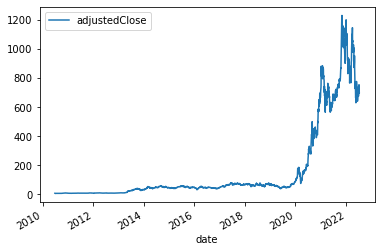

In [16]:
print(df_AdjustedClose.info())
df_AdjustedClose.plot()

In [17]:
# Add EMA to dataframe by appending
# Note: pandas_ta integrates seamlessly into
# our existing dataframe
df_AdjustedClose.ta.ema(close='adjustedClose', length=10, append=True)

C:\Users\15125\AppData\Local\Temp/ipykernel_23772/668832598.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AdjustedClose.ta.ema(close='adjustedClose', length=10, append=True)


date
2010-06-29           NaN
2010-06-30           NaN
2010-07-01           NaN
2010-07-02           NaN
2010-07-06           NaN
                 ...    
2022-07-06    694.967781
2022-07-07    701.997277
2022-07-08    711.141404
2022-07-11    709.666609
2022-07-12    707.765411
Name: EMA_10, Length: 3030, dtype: float64

In [18]:
# Print the first 20 entries of our data
df_AdjustedClose.head(20)

,adjustedClose,EMA_10
date,,
2010-06-29,4.778,NaN
2010-06-30,4.766,NaN
2010-07-01,4.392,NaN
2010-07-02,3.840,NaN
2010-07-06,3.222,NaN
2010-07-07,3.160,NaN
2010-07-08,3.492,NaN
2010-07-09,3.480,NaN
2010-07-12,3.410,NaN


In [19]:
# Drop the first n-rows
df_AdjustedClose.dropna(inplace=True)
# View our newly-formed dataset
df_AdjustedClose.head(10)

C:\Users\15125\AppData\Local\Temp/ipykernel_23772/1199575657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AdjustedClose.dropna(inplace=True)


,adjustedClose,EMA_10
date,,
2010-07-13,3.628,3.816800
2010-07-14,3.968,3.844291
2010-07-15,3.978,3.868602
2010-07-16,4.128,3.915765
2010-07-19,4.382,4.000535
2010-07-20,4.060,4.011347
2010-07-21,4.044,4.017284
2010-07-22,4.200,4.050505
2010-07-23,4.258,4.088231


<AxesSubplot:xlabel='date'>

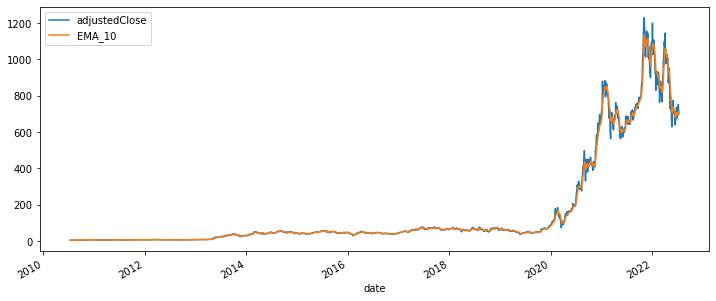

In [20]:
df_AdjustedClose.plot(figsize=(12,5))

In [21]:
 from sklearn.model_selection import train_test_split

In [22]:
# Split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(df_AdjustedClose[['adjustedClose']], df_AdjustedClose[['EMA_10']], test_size=.2)
# Test set
print(X_test.describe())

       adjustedClose
count     605.000000
mean      161.125514
std       276.639943
min         3.664000
25%        21.143999
50%        48.009998
75%        70.433998
max      1222.089966


In [23]:
# Training set
print(X_train.describe())

       adjustedClose
count    2416.000000
mean      154.707772
std       268.562052
min         3.520000
25%        24.306000
50%        47.407999
75%        69.426500
max      1229.910034


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))


Model Coefficients: [[0.9927918]]
Mean Absolute Error: 6.696004537306254
Coefficient of Determination: 0.9956154272455254


In [26]:
dfpred = pd.DataFrame(y_pred)
dfpred.columns=["y_pred"]
dfpred

,y_pred
0,6.566361
1,60.981282
2,4.779335
3,4.674100
4,65.162919
...,...
600,61.088501
601,700.676734
602,40.353049
603,152.445196


In [27]:
y_test

,EMA_10
date,
2011-12-01,6.463365
2018-07-26,62.252510
2011-02-17,4.730812
2011-02-07,4.785382
2019-10-28,56.741441
...,...
2017-05-08,61.685725
2020-12-31,667.212421
2016-10-24,40.136040


In [28]:
df_trend = y_test.copy()
df_trend["y_pred"]=y_pred
df_trend

,EMA_10,y_pred
date,,
2011-12-01,6.463365,6.566361
2018-07-26,62.252510,60.981282
2011-02-17,4.730812,4.779335
2011-02-07,4.785382,4.674100
2019-10-28,56.741441,65.162919
...,...,...
2017-05-08,61.685725,61.088501
2020-12-31,667.212421,700.676734
2016-10-24,40.136040,40.353049


<AxesSubplot:xlabel='date'>

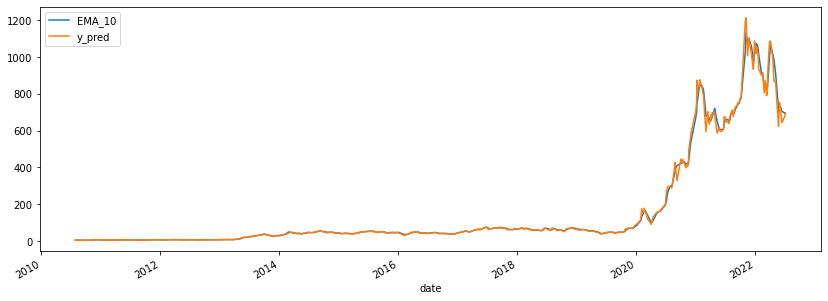

In [29]:
df_trend.plot(figsize=(14,5))

In [30]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0).fit(X_train, y_train)
print(model.score(X_train, y_train))

print(model.score(X_test, y_test))

C:\Users\15125\AppData\Local\Temp/ipykernel_23772/3969865832.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor(random_state=0).fit(X_train, y_train)


0.9992452815718588
0.9957706776911377


In [31]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,accuracy_score
# Printout relevant metrics
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))
# print("Accuracy",accuracy_score(y_test,y_pred)) - not supported for continous data


Mean Absolute Error: 6.696004537306254
Coefficient of Determination: 0.9956154272455254


In [ ]:
# Coefficient of Determination: 0.9925133513467957 close to 1, means the model is nearly perfectly fit
# Mean Absolute Error: 16.136803174699697 this value is high should be close to 0 for a best prediction
# Model Cofficients :[[0.99243097]] - X and Y are closely related -moving avergae does not have deviation from the actual values


In [32]:
predictions_reg = model.predict(X_test)
predictions_reg

array([   6.45721986,   61.73051608,    4.82581107,    4.79669484,
         66.6615107 ,  630.45297184,  130.35712556,   63.73470707,
        100.4094519 ,  380.36884543,    4.91428482,  663.13018247,
         48.68210171,    5.34238034,    4.82581107,   31.43178721,
         61.51799691,    6.14977845,   70.14666373,   54.15868848,
         28.71664913,   48.50269276,   26.16239689,    5.8422335 ,
         28.51728743,  151.78687094,   45.1263661 ,   64.46500071,
          3.81156228,    5.55074566,  296.4212058 ,   58.23805111,
          5.10755526,   61.48259703,   47.2217334 ,   59.02545666,
          4.47967859,   31.68754191,   19.66126815,    5.47991699,
        629.52994531,    7.01518765,    5.66585184,   43.66858759,
         34.77363343,   43.15315413,  100.89210508,  853.62288266,
         69.9599694 ,   69.19553025,   37.00799906,    6.02916123,
         47.84722455,   40.95329571,   34.94243064,   65.78285624,
         67.3653701 ,   90.83302137,  661.82601462,   43.50692

In [33]:
dfpred_reg = pd.DataFrame(predictions_reg)
dfpred_reg.columns=["y_pred"]
dfpred_reg

,y_pred
0,6.457220
1,61.730516
2,4.825811
3,4.796695
4,66.661511
...,...
600,61.522211
601,696.086502
602,41.714453
603,146.913850


In [34]:
df_reg = y_test.copy()
df_reg["y_pred"]=y_pred
df_reg

,EMA_10,y_pred
date,,
2011-12-01,6.463365,6.566361
2018-07-26,62.252510,60.981282
2011-02-17,4.730812,4.779335
2011-02-07,4.785382,4.674100
2019-10-28,56.741441,65.162919
...,...,...
2017-05-08,61.685725,61.088501
2020-12-31,667.212421,700.676734
2016-10-24,40.136040,40.353049


<AxesSubplot:xlabel='date'>

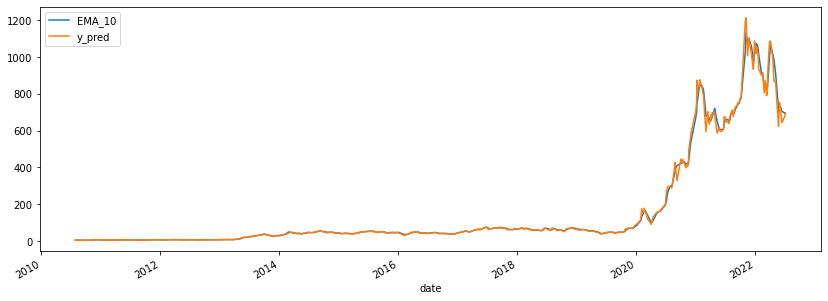

In [35]:
df_reg.plot(figsize=(14,5))